# Table of Contents

- [Data Preparation](#data-preparation)
  - [Importing Libraries](#importing-libraries)
  - [Defining Sturges Function](#defining-sturges-function)
  - [Loading Data](#loading-data)
  - [Data Preprocessing](#data-preprocessing)
- [General Statistics](#general-statistics)
  - [Histograms of Datasets](#histograms-of-datasets)
  - [Empirical Cumulative Distribution Functions of Datasets](#empirical-cumulative-distribution-functions-of-dataSets)
  - [Boxplots of Datasets](#Boxplots-of-Datasets)
  - [Means of Datasets](#The-Means-of-Datasets)
  - [Variances of Datasets](#The-Variances-of-Datasets)
  - [Standard Deviations of Datasets](#Standard-Deviations-of-Datasets)
- [Stats by time](#Stats-by-time)
  - [Converting Datetime to Hour](#Converting-Datetime-to-Hour)
  - [Boxplots of Smart TV Data Sets by Hour](#Boxplots-of-Smart-TV-Data-Sets-by-Hour)
  - [Boxplots of Chromecast Data Sets by Hour](#Boxplots-of-Chromecast-Data-Sets-by-Hour)
  - [Mean Data Sets by Hour](#Mean-Data-Sets-by-Hour)
  - [Variance Data Sets by Hour](#Variance-Data-Sets-by-Hour)
  - [Standard Deviation Data Sets by Hour](#Standard-Deviations-Data-Sets-by-Hour)
- [Hours with More Traffic](#Hours-with-More-Traffic)
- [Correlation Stats in Hours with More Traffic](#Correlation-Stats-in-Hours-with-More-Traffic)
- [Comparation between Devices](#Comparation-between-Devices)
- [Conclusion](#Conclusion)


# Data Preparation

## Importing Libraries

In [6]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from statsmodels.distributions.empirical_distribution import ECDF

## Defining Sturges Function

In [7]:
def get_sturges_bins(data: pd.Series) -> int:
    """
    Calculates the number of bins for a histogram using Sturges' rule.

    Args:
        data: A pandas Series representing the data for which the number of bins is to be calculated.

    Returns:
        An integer representing the optimal number of bins for a histogram.
    """
    num_bins = int(1 + 3.3 * np.log10(len(data)))
    return num_bins

## Loading data

In [8]:
df_smart_tv = pd.read_csv('./csv/smart-tv-dataset.csv')
df_chromecast = pd.read_csv('./csv/chromecast-dataset.csv')

df_smart_tv, df_chromecast

FileNotFoundError: [Errno 2] No such file or directory: './csv/smart-tv-dataset.csv'

## Data Preprocessing

In [ ]:
df_smart_tv[["bytes_up", "bytes_down"]] += 1
df_smart_tv[["bytes_up", "bytes_down"]] = np.log10(df_smart_tv[["bytes_up", "bytes_down"]])

df_chromecast[["bytes_up", "bytes_down"]] += 1
df_chromecast[["bytes_up", "bytes_down"]] = np.log10(df_chromecast[["bytes_up", "bytes_down"]])

df_smart_tv, df_chromecast

(         device_id            date_hour  bytes_up  bytes_down
 0         77209603  2021-11-22 15:23:00  5.123636    6.449963
 1         77209603  2021-11-22 15:24:00  5.063602    6.354955
 2         77209603  2021-11-22 15:25:00  5.057023    6.363475
 3         77209603  2021-11-22 15:26:00  4.987539    6.302449
 4         77209603  2021-11-22 15:27:00  4.597372    5.906413
 ...            ...                  ...       ...         ...
 4417898   40241962  2021-11-25 23:19:00  0.954243    0.954243
 4417899   40241962  2021-11-25 23:21:00  0.954243    0.954243
 4417900   40241962  2021-11-25 23:23:00  0.954243    0.954243
 4417901   40241962  2021-11-25 23:25:00  0.954243    0.954243
 4417902   40241962  2021-11-25 23:26:00  0.954243    1.518514
 
 [4417903 rows x 4 columns],
          device_id            date_hour  bytes_up  bytes_down
 0         66161985  2021-09-06 00:01:00  3.475383    4.691848
 1         66161985  2021-09-06 00:02:00  2.836916    2.517536
 2         66161985  202

# General Statistics

### Histograms of Datasets

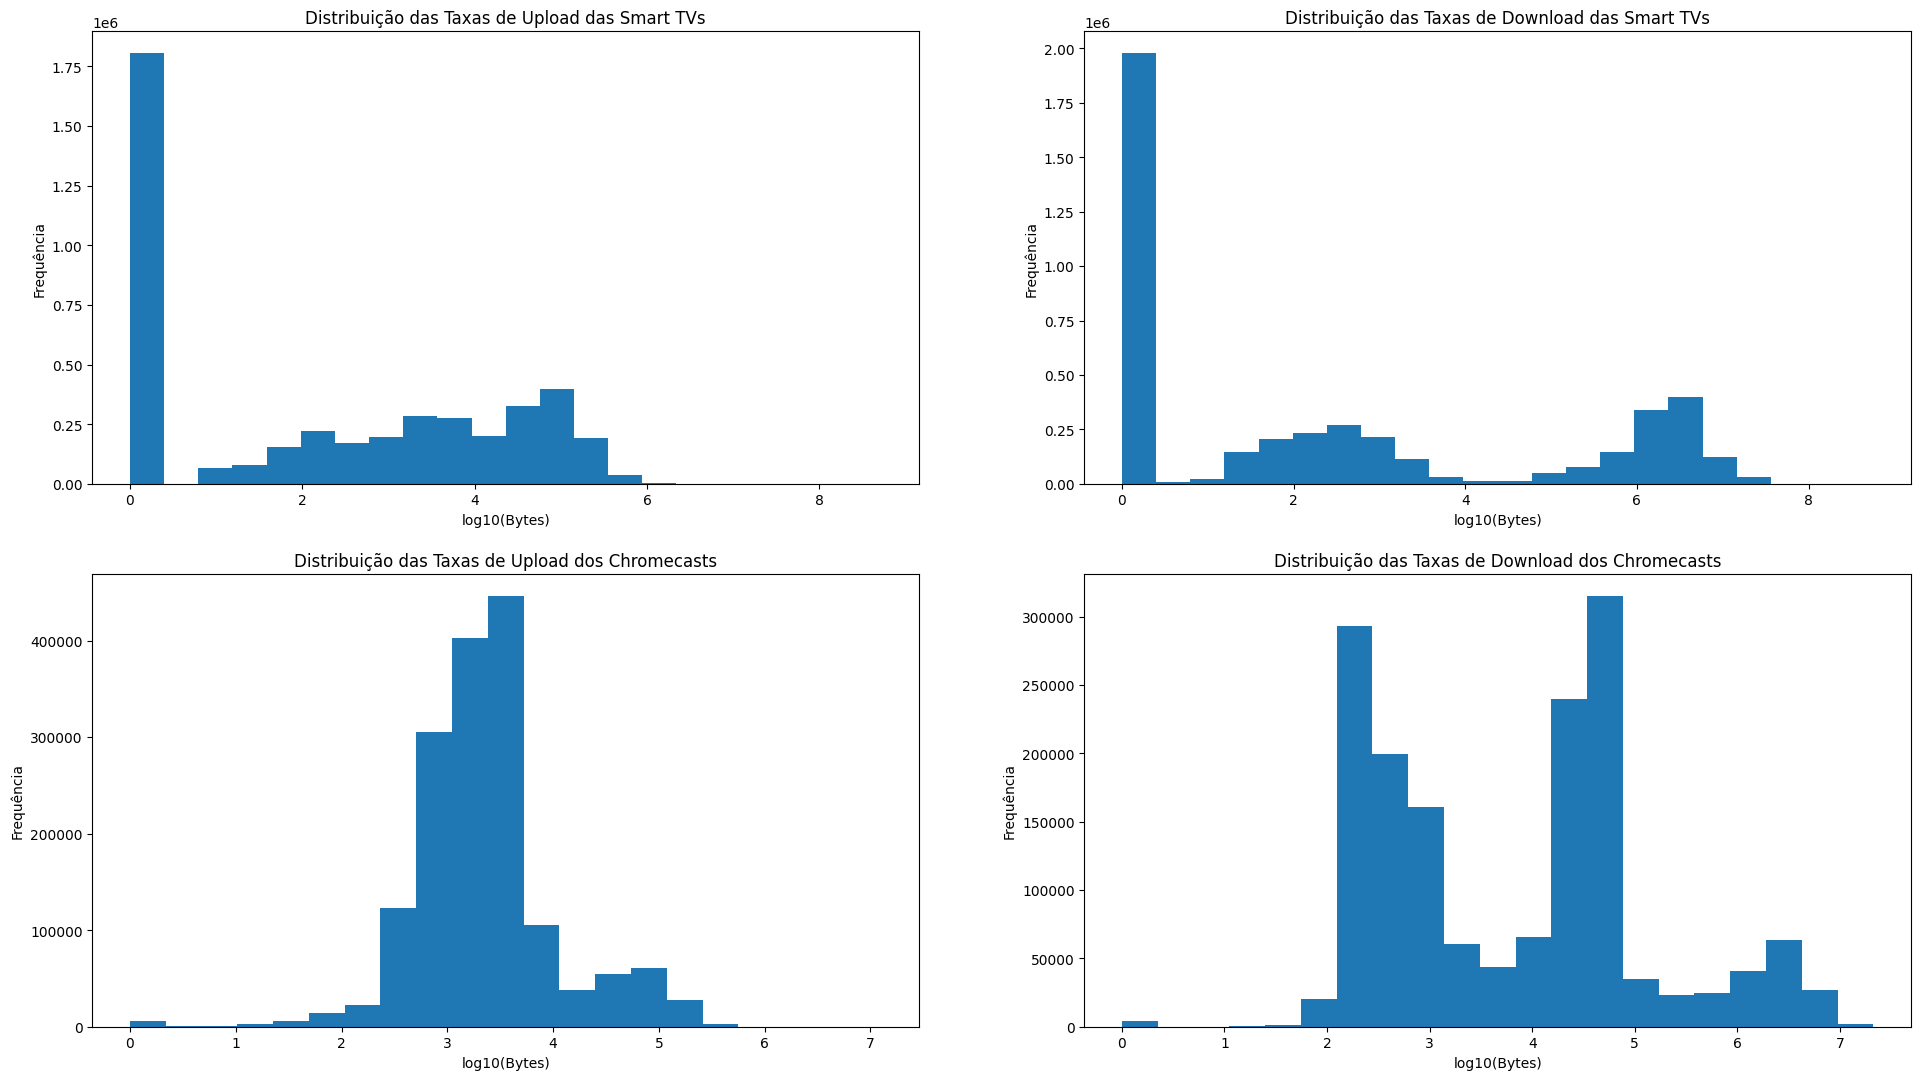

In [ ]:
def plot_histogram(ax: plt.Axes, data: pd.Series, title: str) -> None:
    """
    Plots a histogram of the given data on the given axis.

    Args:
        ax: A matplotlib Axes object representing the axis on which the histogram is to be plotted.
        data: A pandas Series representing the data to be plotted.
        title: A string representing the title of the plot.

    Returns:
        None
    """
    bins = get_sturges_bins(data)
    ax.hist(data, bins=bins)
    ax.set_title(title)
    ax.set_xlabel("log10(Bytes)")
    ax.set_ylabel("Frequência")

fig, ax = plt.subplots(2, 2, figsize=(23.465, 12.925))

plot_histogram(ax[0][0], df_smart_tv['bytes_up'], "Distribuição das Taxas de Upload das Smart TVs")
plot_histogram(ax[0][1], df_smart_tv['bytes_down'], "Distribuição das Taxas de Download das Smart TVs")
plot_histogram(ax[1][0], df_chromecast['bytes_up'], "Distribuição das Taxas de Upload dos Chromecasts")
plot_histogram(ax[1][1], df_chromecast['bytes_down'], "Distribuição das Taxas de Download dos Chromecasts")

plt.show()    

### Empirical Cumulative Distribution Functions of Data Sets

NameError: name 'df_smart_tv' is not defined

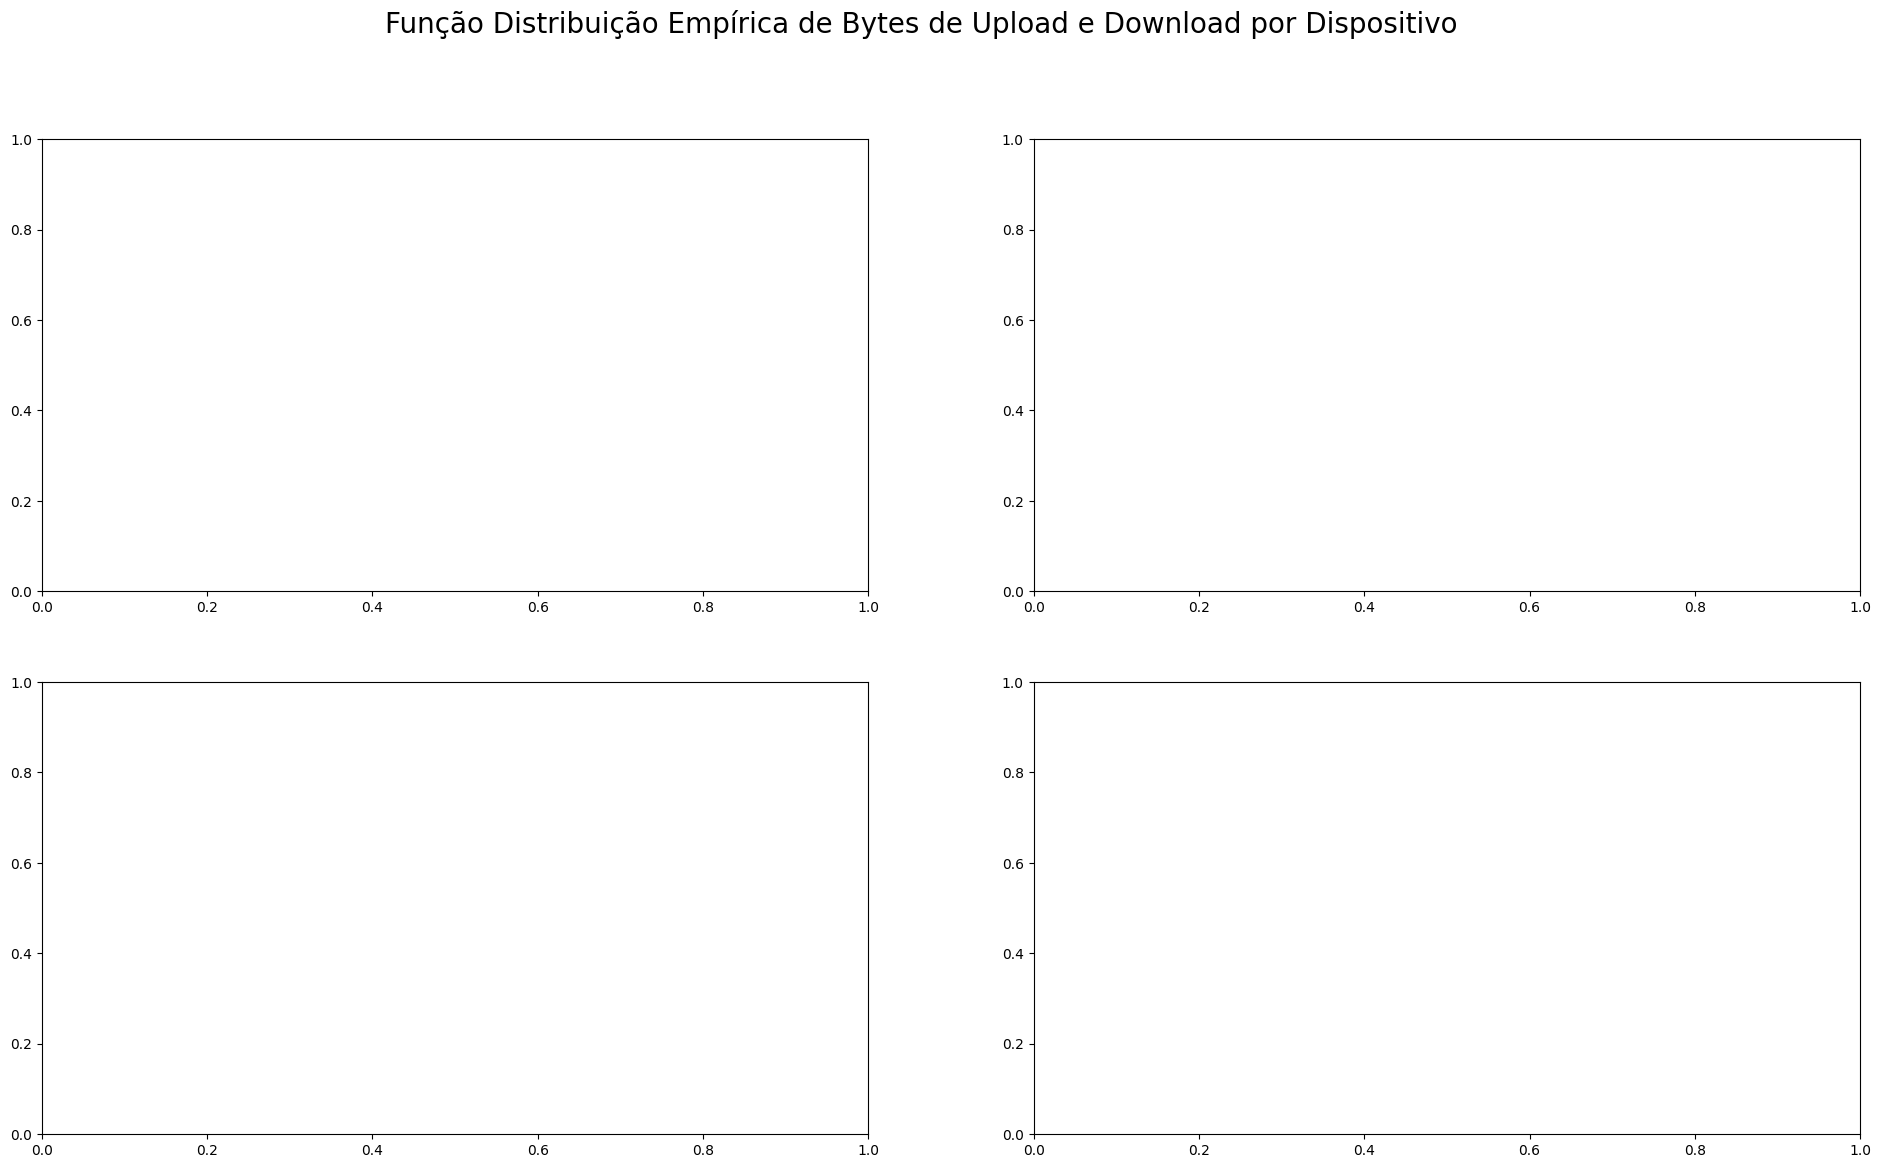

In [5]:
def plot_ecdf(ax: plt.Axes, data: pd.Series, title: str) -> None:
    """
    Creates a plot with the empirical cumulative distribution function (ECDF) of the given data.
    
    Parameters:
        ax: A matplotlib Axes object representing the axis on which the histogram is to be plotted.
        data: A pandas Series representing the data to be plotted.
        title: A string representing the title of the plot.

    Returns:
        None
    """
    ecdf = ECDF(data)
    ax.plot(ecdf.x, ecdf.y)
    ax.set_title(title)
    ax.set_xlabel("log10(Bytes)")
    ax.set_ylabel("Probabilidade Acumulada")

fig, ax = plt.subplots(2, 2, figsize=(23.465, 12.925))

fig.suptitle('Função Distribuição Empírica de Bytes de Upload e Download por Dispositivo', fontsize=20)

plot_ecdf(ax[0][0], df_smart_tv['bytes_up'], "ECDF dos dados dos Uploads das Smart TVs")
plot_ecdf(ax[0][1], df_smart_tv['bytes_down'], "ECDF dos dados dos Downloads das Smart TVs")
plot_ecdf(ax[1][0], df_chromecast['bytes_up'], "ECDF dos dados dos Uploads dos Chromecasts")
plot_ecdf(ax[1][1], df_chromecast['bytes_down'], "ECDF dos dados dos Downloads dos Chromecasts")

plt.show()

### Boxplots of Data Sets

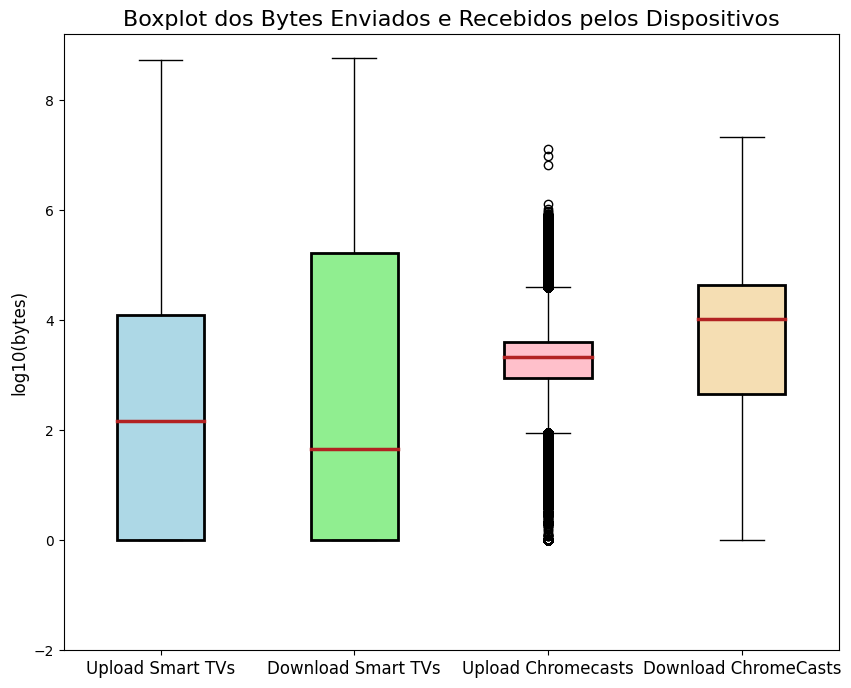

In [8]:
fig, ax = plt.subplots(figsize=(10, 8))

boxprops = dict(linestyle='-', linewidth=2, color='black')
medianprops = dict(linestyle='-', linewidth=2.5, color='firebrick')

bp = ax.boxplot([smart_tv_data['bytes_up'], smart_tv_data['bytes_down'], chromecast_data['bytes_up'], chromecast_data['bytes_down']],
                boxprops=boxprops, medianprops=medianprops, patch_artist=True)

colors = ['lightblue', 'lightgreen', 'pink', 'wheat']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

ax.set_xticklabels(['Upload Smart TVs', 'Download Smart TVs', 'Upload Chromecasts', 'Download ChromeCasts'], fontsize=12)
ax.set_ylabel('log10(bytes)', fontsize=12)
ax.set_title('Boxplot dos Bytes Enviados e Recebidos pelos Dispositivos', fontsize=16)

ax.grid(False)
ax.set_ylim(bottom=-2)

plt.show()

### Means of Data Sets

In [ ]:
means = {
    'smart_tv_up': np.mean(smart_tv_data['bytes_up']),
    'smart_tv_down': np.mean(smart_tv_data['bytes_down']),
    'chromecast_up': np.mean(chromecast_data['bytes_up']),
    'chromecast_down': np.mean(chromecast_data['bytes_down'])
}

means

{'smart_tv_up': 2.158288206507635,
 'smart_tv_down': 2.351678620482737,
 'chromecast_up': 3.3502996618084153,
 'chromecast_down': 3.800045706037558}

### Variances of Data Sets

In [ ]:
vars = {
    'smart_tv_up': np.var(smart_tv_data['bytes_up']),
    'smart_tv_down': np.var(smart_tv_data['bytes_down']),
    'chromecast_up': np.var(chromecast_data['bytes_up']),
    'chromecast_down': np.var(chromecast_data['bytes_down'])
}

vars

{'smart_tv_up': 4.110138414147299,
 'smart_tv_down': 6.721322376032034,
 'chromecast_up': 0.45996836246102296,
 'chromecast_down': 1.663894572605984}

### Standard Deviations of Data Sets

In [ ]:
stds = {
    'smart_tv_up': np.std(smart_tv_data['bytes_up']),
    'smart_tv_down': np.std(smart_tv_data['bytes_down']),
    'chromecast_up': np.std(chromecast_data['bytes_up']),
    'chromecast_down': np.std(chromecast_data['bytes_down'])
}

stds

{'smart_tv_up': 2.0273476303158517,
 'smart_tv_down': 2.5925513256311885,
 'chromecast_up': 0.6782096744083078,
 'chromecast_down': 1.2899203745216152}

# Stats by time

### Converting Datetime to Hour

In [ ]:
def convert_date_hour(df):
    df["date_hour"] = [datetime.strptime(x, "%Y-%m-%d %H:%M:%S").hour for x in df["date_hour"]]

convert_date_hour(smart_tv_data)
convert_date_hour(chromecast_data)

smart_tv_data, chromecast_data

(         device_id  date_hour  bytes_up  bytes_down
 0         77209603         15  5.123636    6.449963
 1         77209603         15  5.063602    6.354955
 2         77209603         15  5.057023    6.363475
 3         77209603         15  4.987539    6.302449
 4         77209603         15  4.597372    5.906413
 ...            ...        ...       ...         ...
 4417898   40241962         23  0.954243    0.954243
 4417899   40241962         23  0.954243    0.954243
 4417900   40241962         23  0.954243    0.954243
 4417901   40241962         23  0.954243    0.954243
 4417902   40241962         23  0.954243    1.518514
 
 [4417903 rows x 4 columns],
          device_id  date_hour  bytes_up  bytes_down
 0         66161985          0  3.475383    4.691848
 1         66161985          0  2.836916    2.517536
 2         66161985          0  3.652720    4.578812
 3         66161985          0  2.890496    2.362105
 4         66161985          0  3.488877    4.713136
 ...           

### Boxplots of Smart TV Data Sets by Hour

<Axes: title={'center': 'bytes_up'}, xlabel='date_hour'>

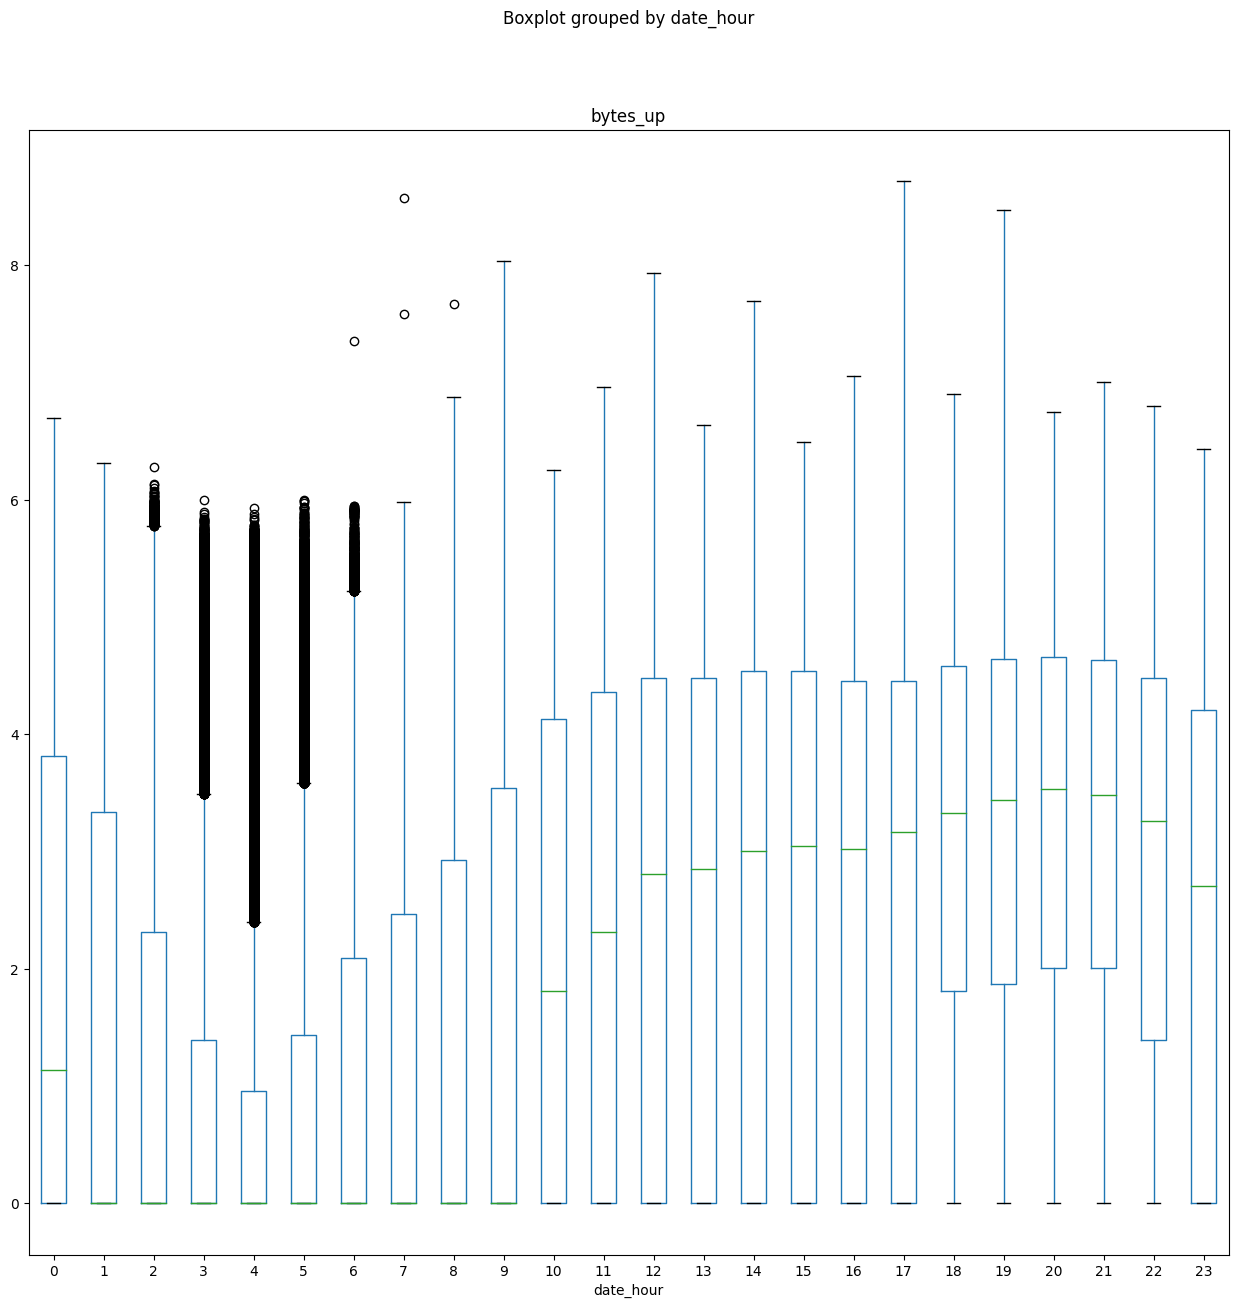

In [ ]:
smart_tv_data.boxplot(column="bytes_up", by="date_hour", figsize=(15, 15), grid=False)

<Axes: title={'center': 'bytes_down'}, xlabel='date_hour'>

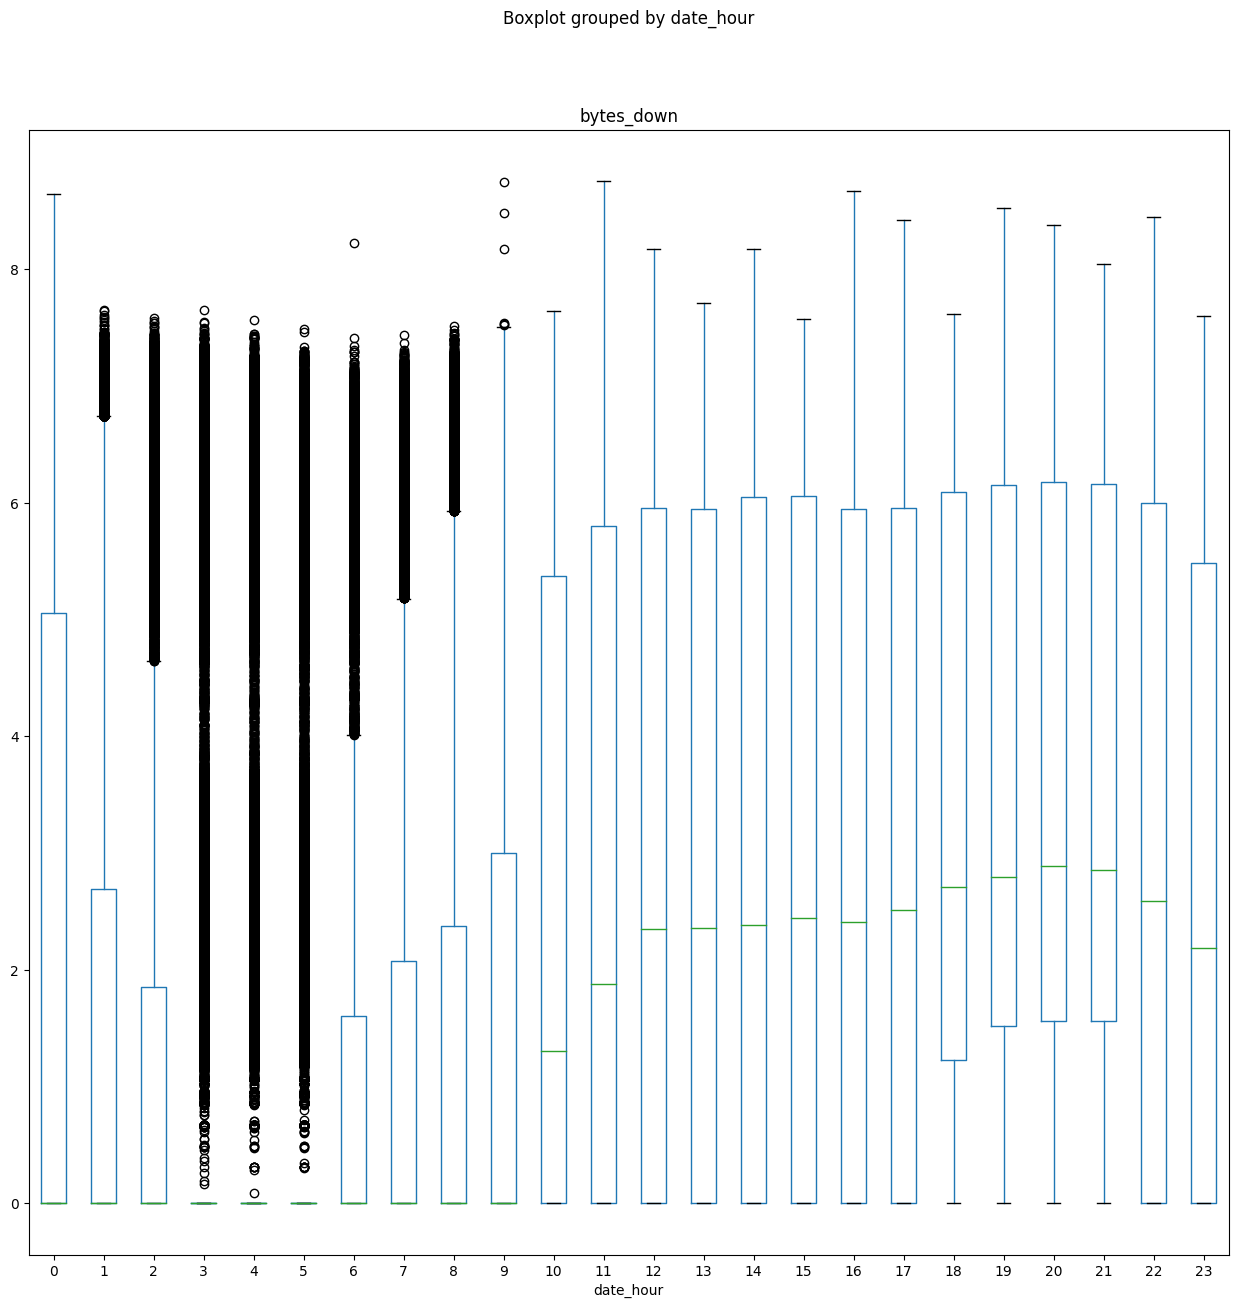

In [ ]:
smart_tv_data.boxplot(column="bytes_down", by="date_hour", figsize=(15, 15), grid=False)

### Boxplots of Chromecast Data Sets by Hour

<Axes: title={'center': 'bytes_up'}, xlabel='date_hour'>

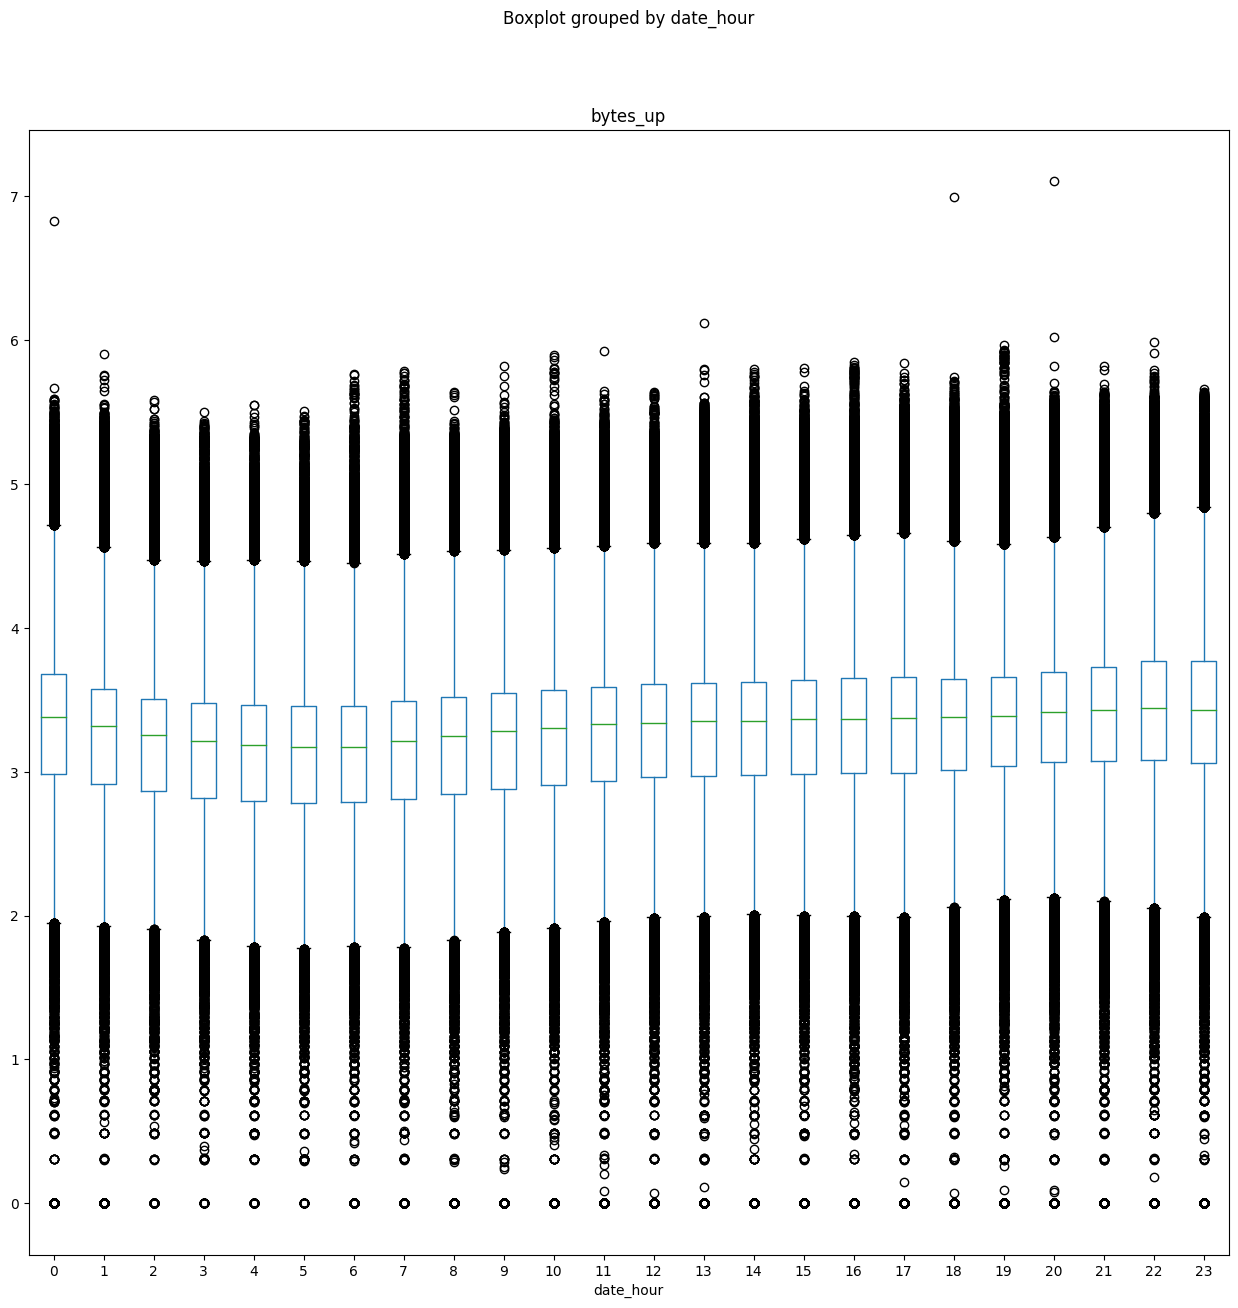

In [ ]:
chromecast_data.boxplot(column="bytes_up", by="date_hour", figsize=(15, 15), grid=False)

<Axes: title={'center': 'bytes_down'}, xlabel='date_hour'>

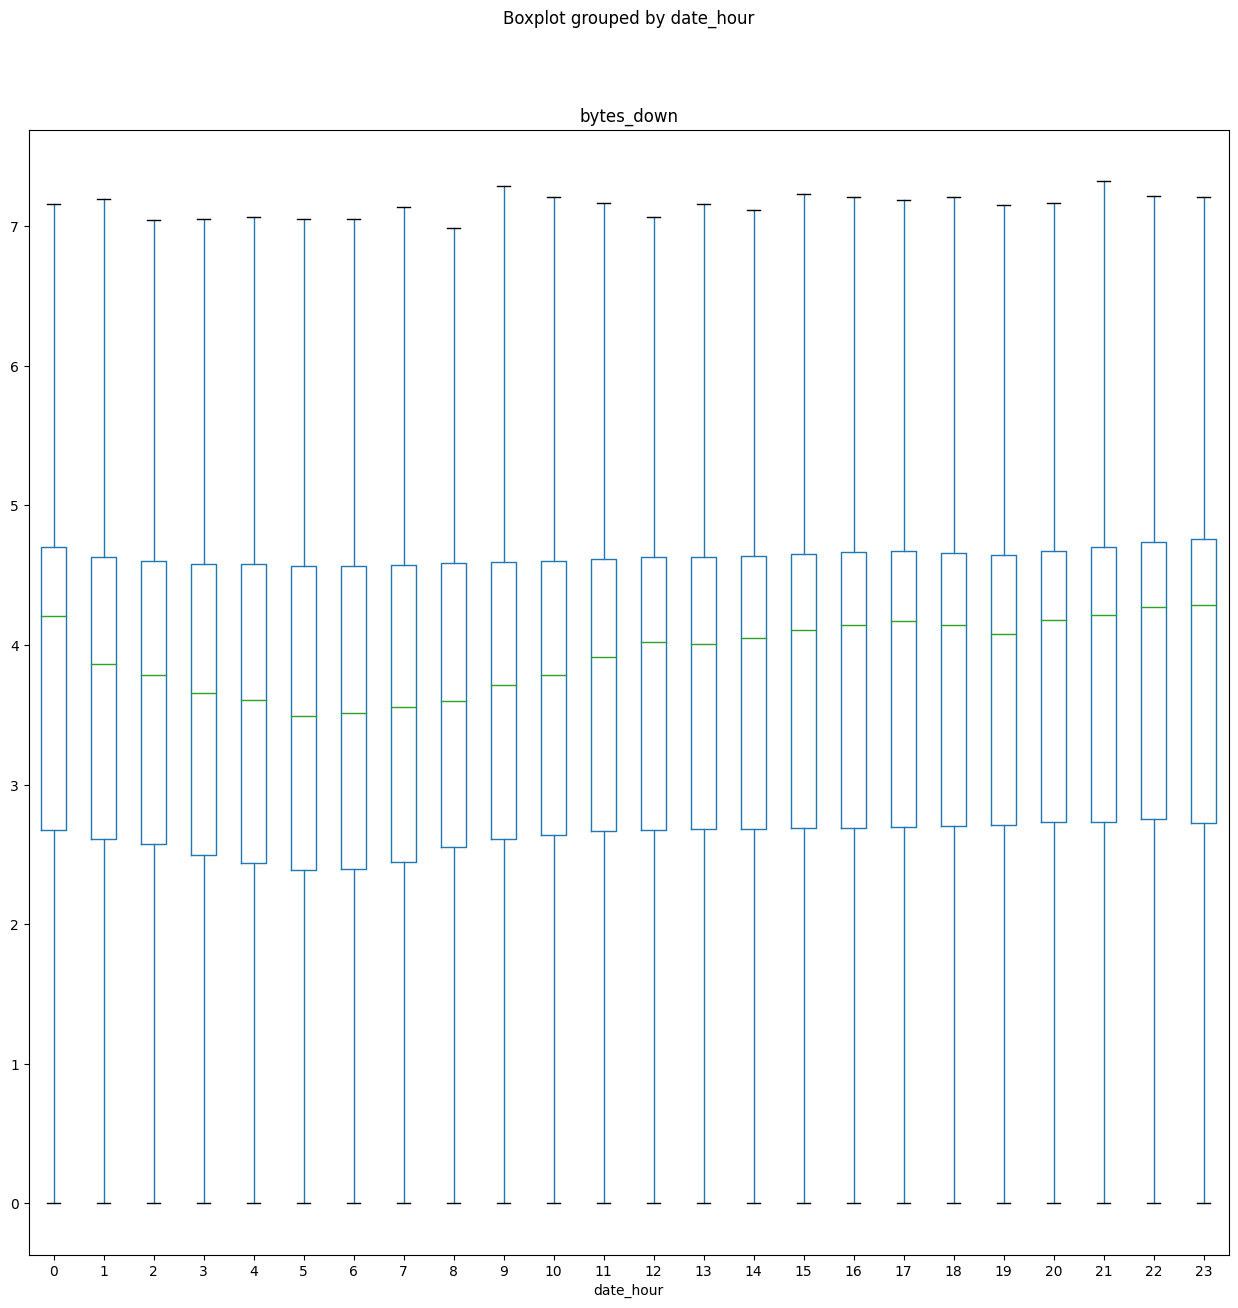

In [ ]:
chromecast_data.boxplot(column="bytes_down", by="date_hour", figsize=(15, 15), grid=False)

### Mean Data Sets by Hour

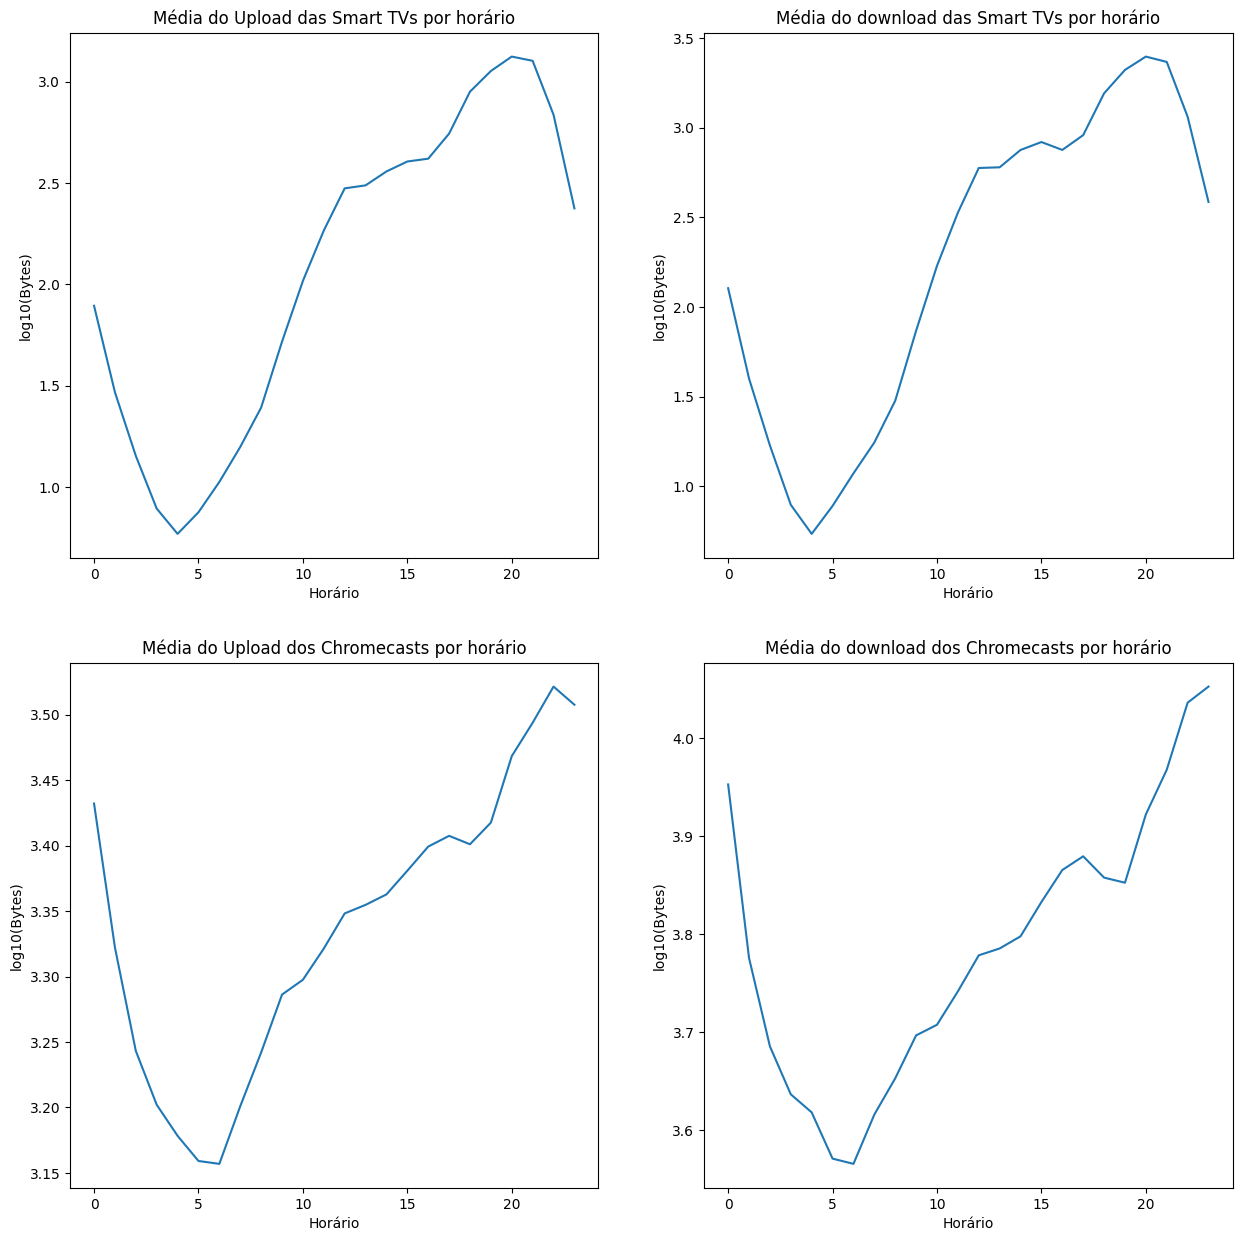

In [ ]:
def plot_data(df, ax, title):
    """Plot the data on the given axis with the given title."""
    ax.plot(df)
    ax.set_title(title)
    ax.set_xlabel("Horário")
    ax.set_ylabel("log10(Bytes)")

fig, ax = plt.subplots(2, 2, figsize=(15, 15))

plot_data(smart_tv_data.groupby("date_hour")["bytes_up"].mean(), ax[0][0], "Média do Upload das Smart TVs por horário")
plot_data(smart_tv_data.groupby("date_hour")["bytes_down"].mean(), ax[0][1], "Média do download das Smart TVs por horário")

plot_data(chromecast_data.groupby("date_hour")["bytes_up"].mean(), ax[1][0], "Média do Upload dos Chromecasts por horário")
plot_data(chromecast_data.groupby("date_hour")["bytes_down"].mean(), ax[1][1], "Média do download dos Chromecasts por horário")

plt.show()

### Variance Data Sets by Hour

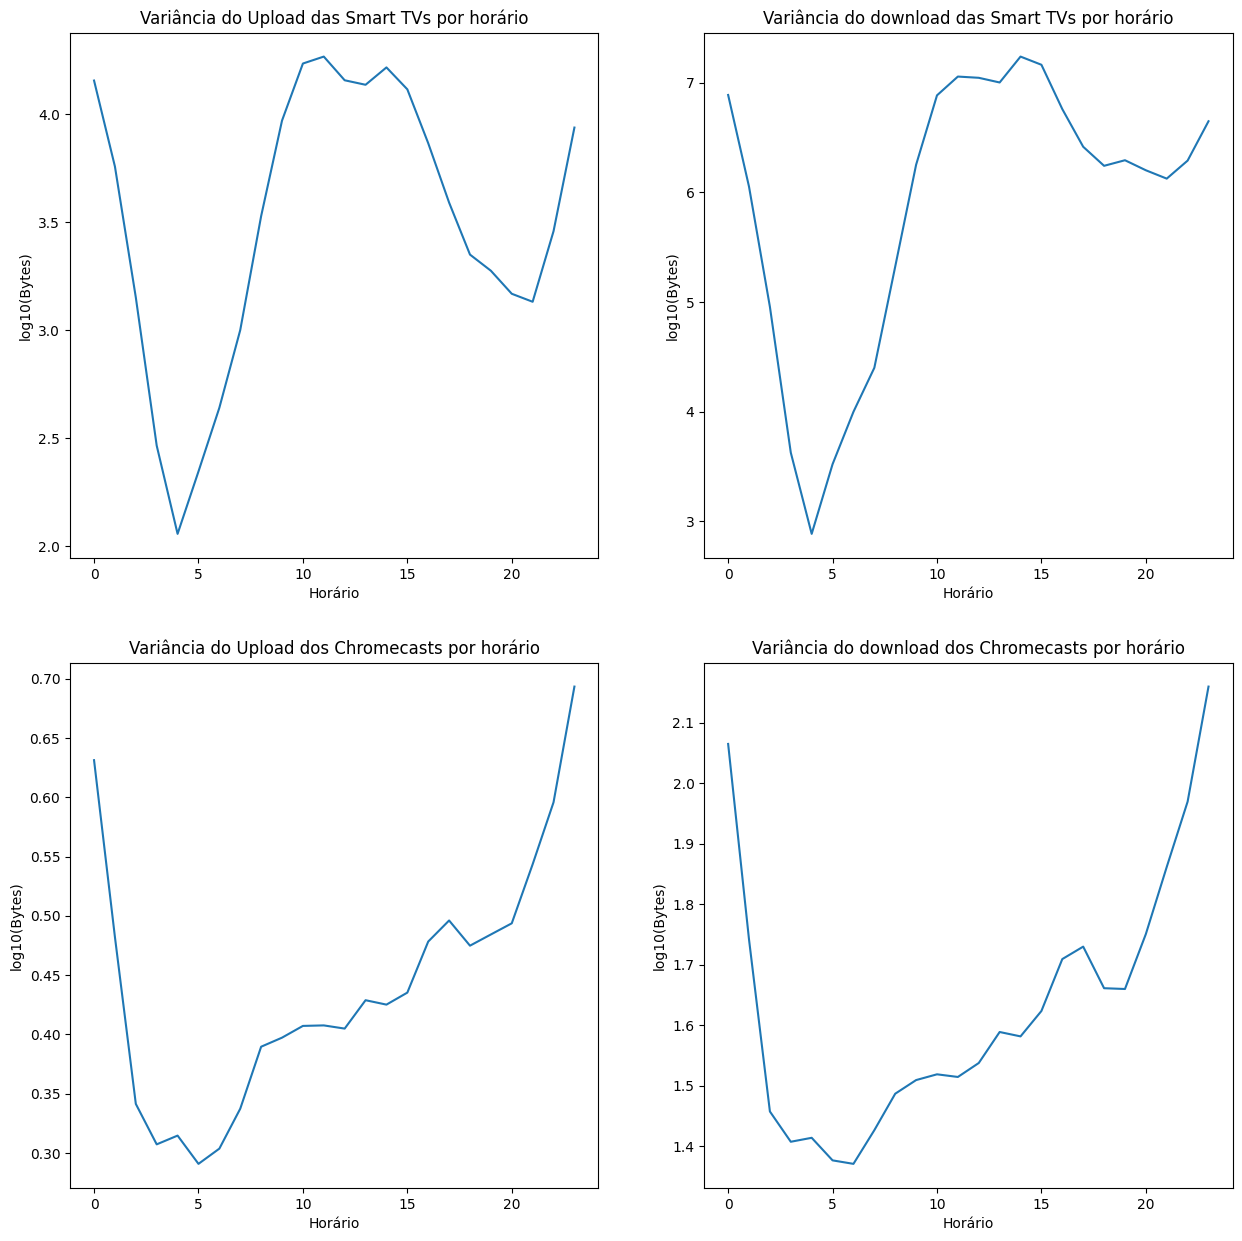

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))

plot_data(smart_tv_data.groupby("date_hour")["bytes_up"].var(), ax[0][0], "Variância do Upload das Smart TVs por horário")
plot_data(smart_tv_data.groupby("date_hour")["bytes_down"].var(), ax[0][1], "Variância do download das Smart TVs por horário")

plot_data(chromecast_data.groupby("date_hour")["bytes_up"].var(), ax[1][0], "Variância do Upload dos Chromecasts por horário")
plot_data(chromecast_data.groupby("date_hour")["bytes_down"].var(), ax[1][1], "Variância do download dos Chromecasts por horário")

plt.show()

### Standard Deviation Data Sets by Hour

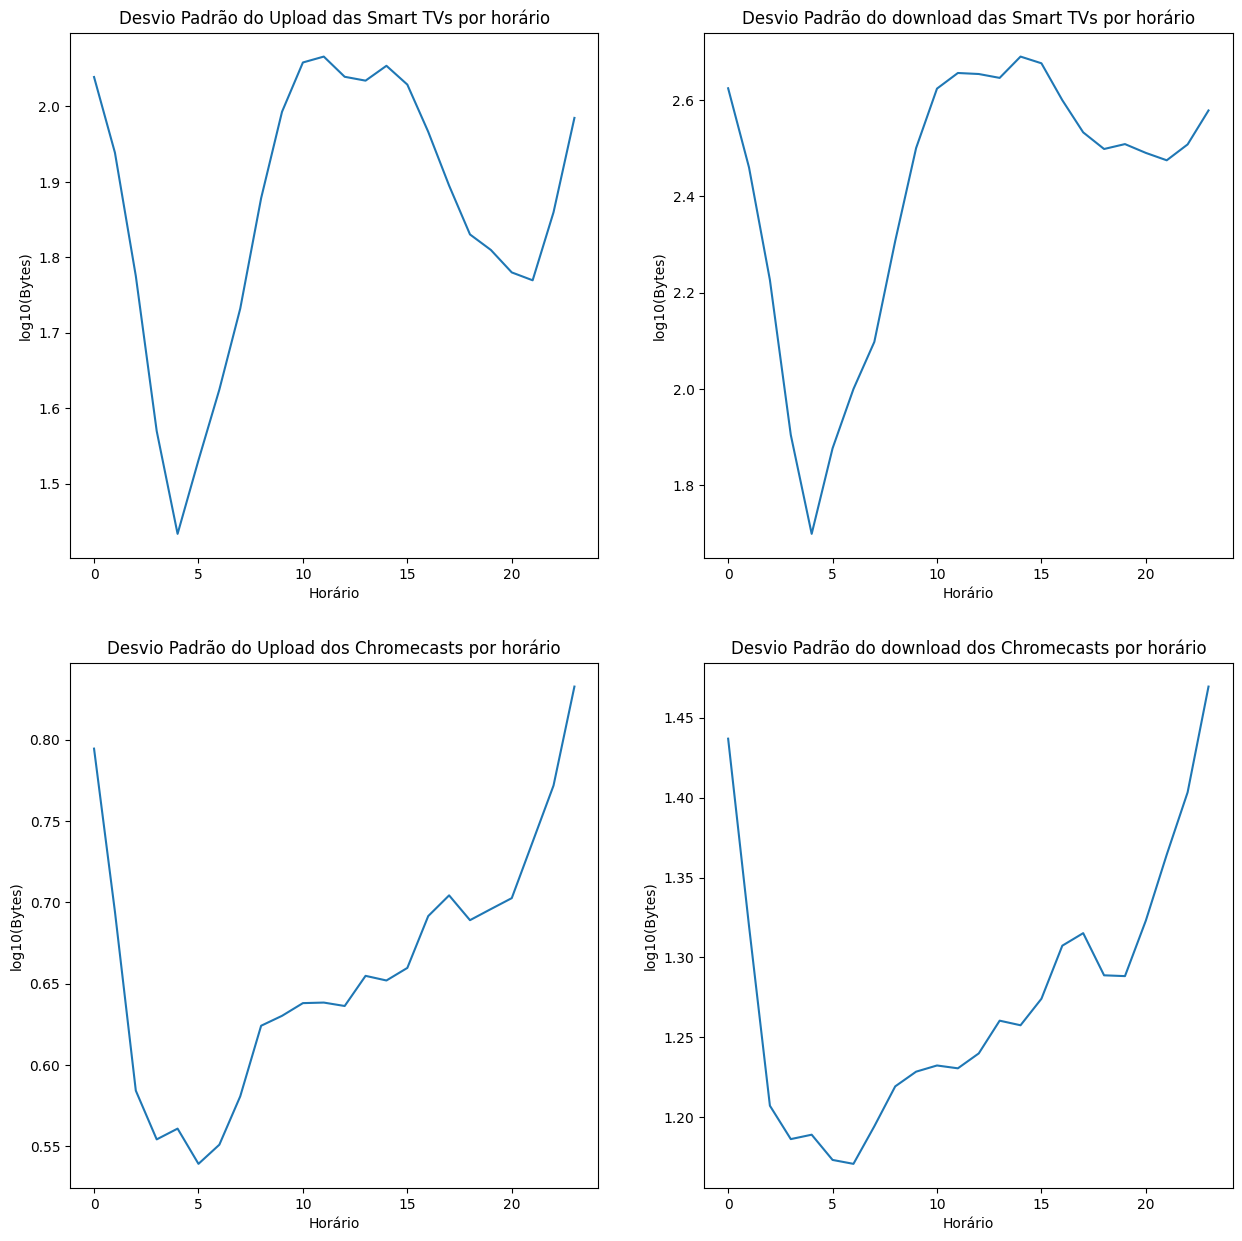

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))

plot_data(smart_tv_data.groupby("date_hour")["bytes_up"].std(), ax[0][0], "Desvio Padrão do Upload das Smart TVs por horário")
plot_data(smart_tv_data.groupby("date_hour")["bytes_down"].std(), ax[0][1], "Desvio Padrão do download das Smart TVs por horário")

plot_data(chromecast_data.groupby("date_hour")["bytes_up"].std(), ax[1][0], "Desvio Padrão do Upload dos Chromecasts por horário")
plot_data(chromecast_data.groupby("date_hour")["bytes_down"].std(), ax[1][1], "Desvio Padrão do download dos Chromecasts por horário")

plt.show()

# Hours with More Traffic

In [ ]:
data_set_1 = smart_tv_data.groupby("date_hour")["bytes_up"].median().argmax()
data_set_2 = smart_tv_data.groupby("date_hour")["bytes_up"].mean().argmax()
data_set_3 = smart_tv_data.groupby("date_hour")["bytes_down"].median().argmax()
data_set_4 = smart_tv_data.groupby("date_hour")["bytes_down"].mean().argmax()
data_set_5 = chromecast_data.groupby("date_hour")["bytes_up"].median().argmax()
data_set_6 = chromecast_data.groupby("date_hour")["bytes_up"].mean().argmax()
data_set_7 = chromecast_data.groupby("date_hour")["bytes_down"].median().argmax()
data_set_8 = chromecast_data.groupby("date_hour")["bytes_down"].mean().argmax()

data_set_1, data_set_2, data_set_3, data_set_4, data_set_5, data_set_6, data_set_7, data_set_8

(20, 20, 20, 20, 22, 22, 23, 23)

IndexError: index 2 is out of bounds for axis 0 with size 2

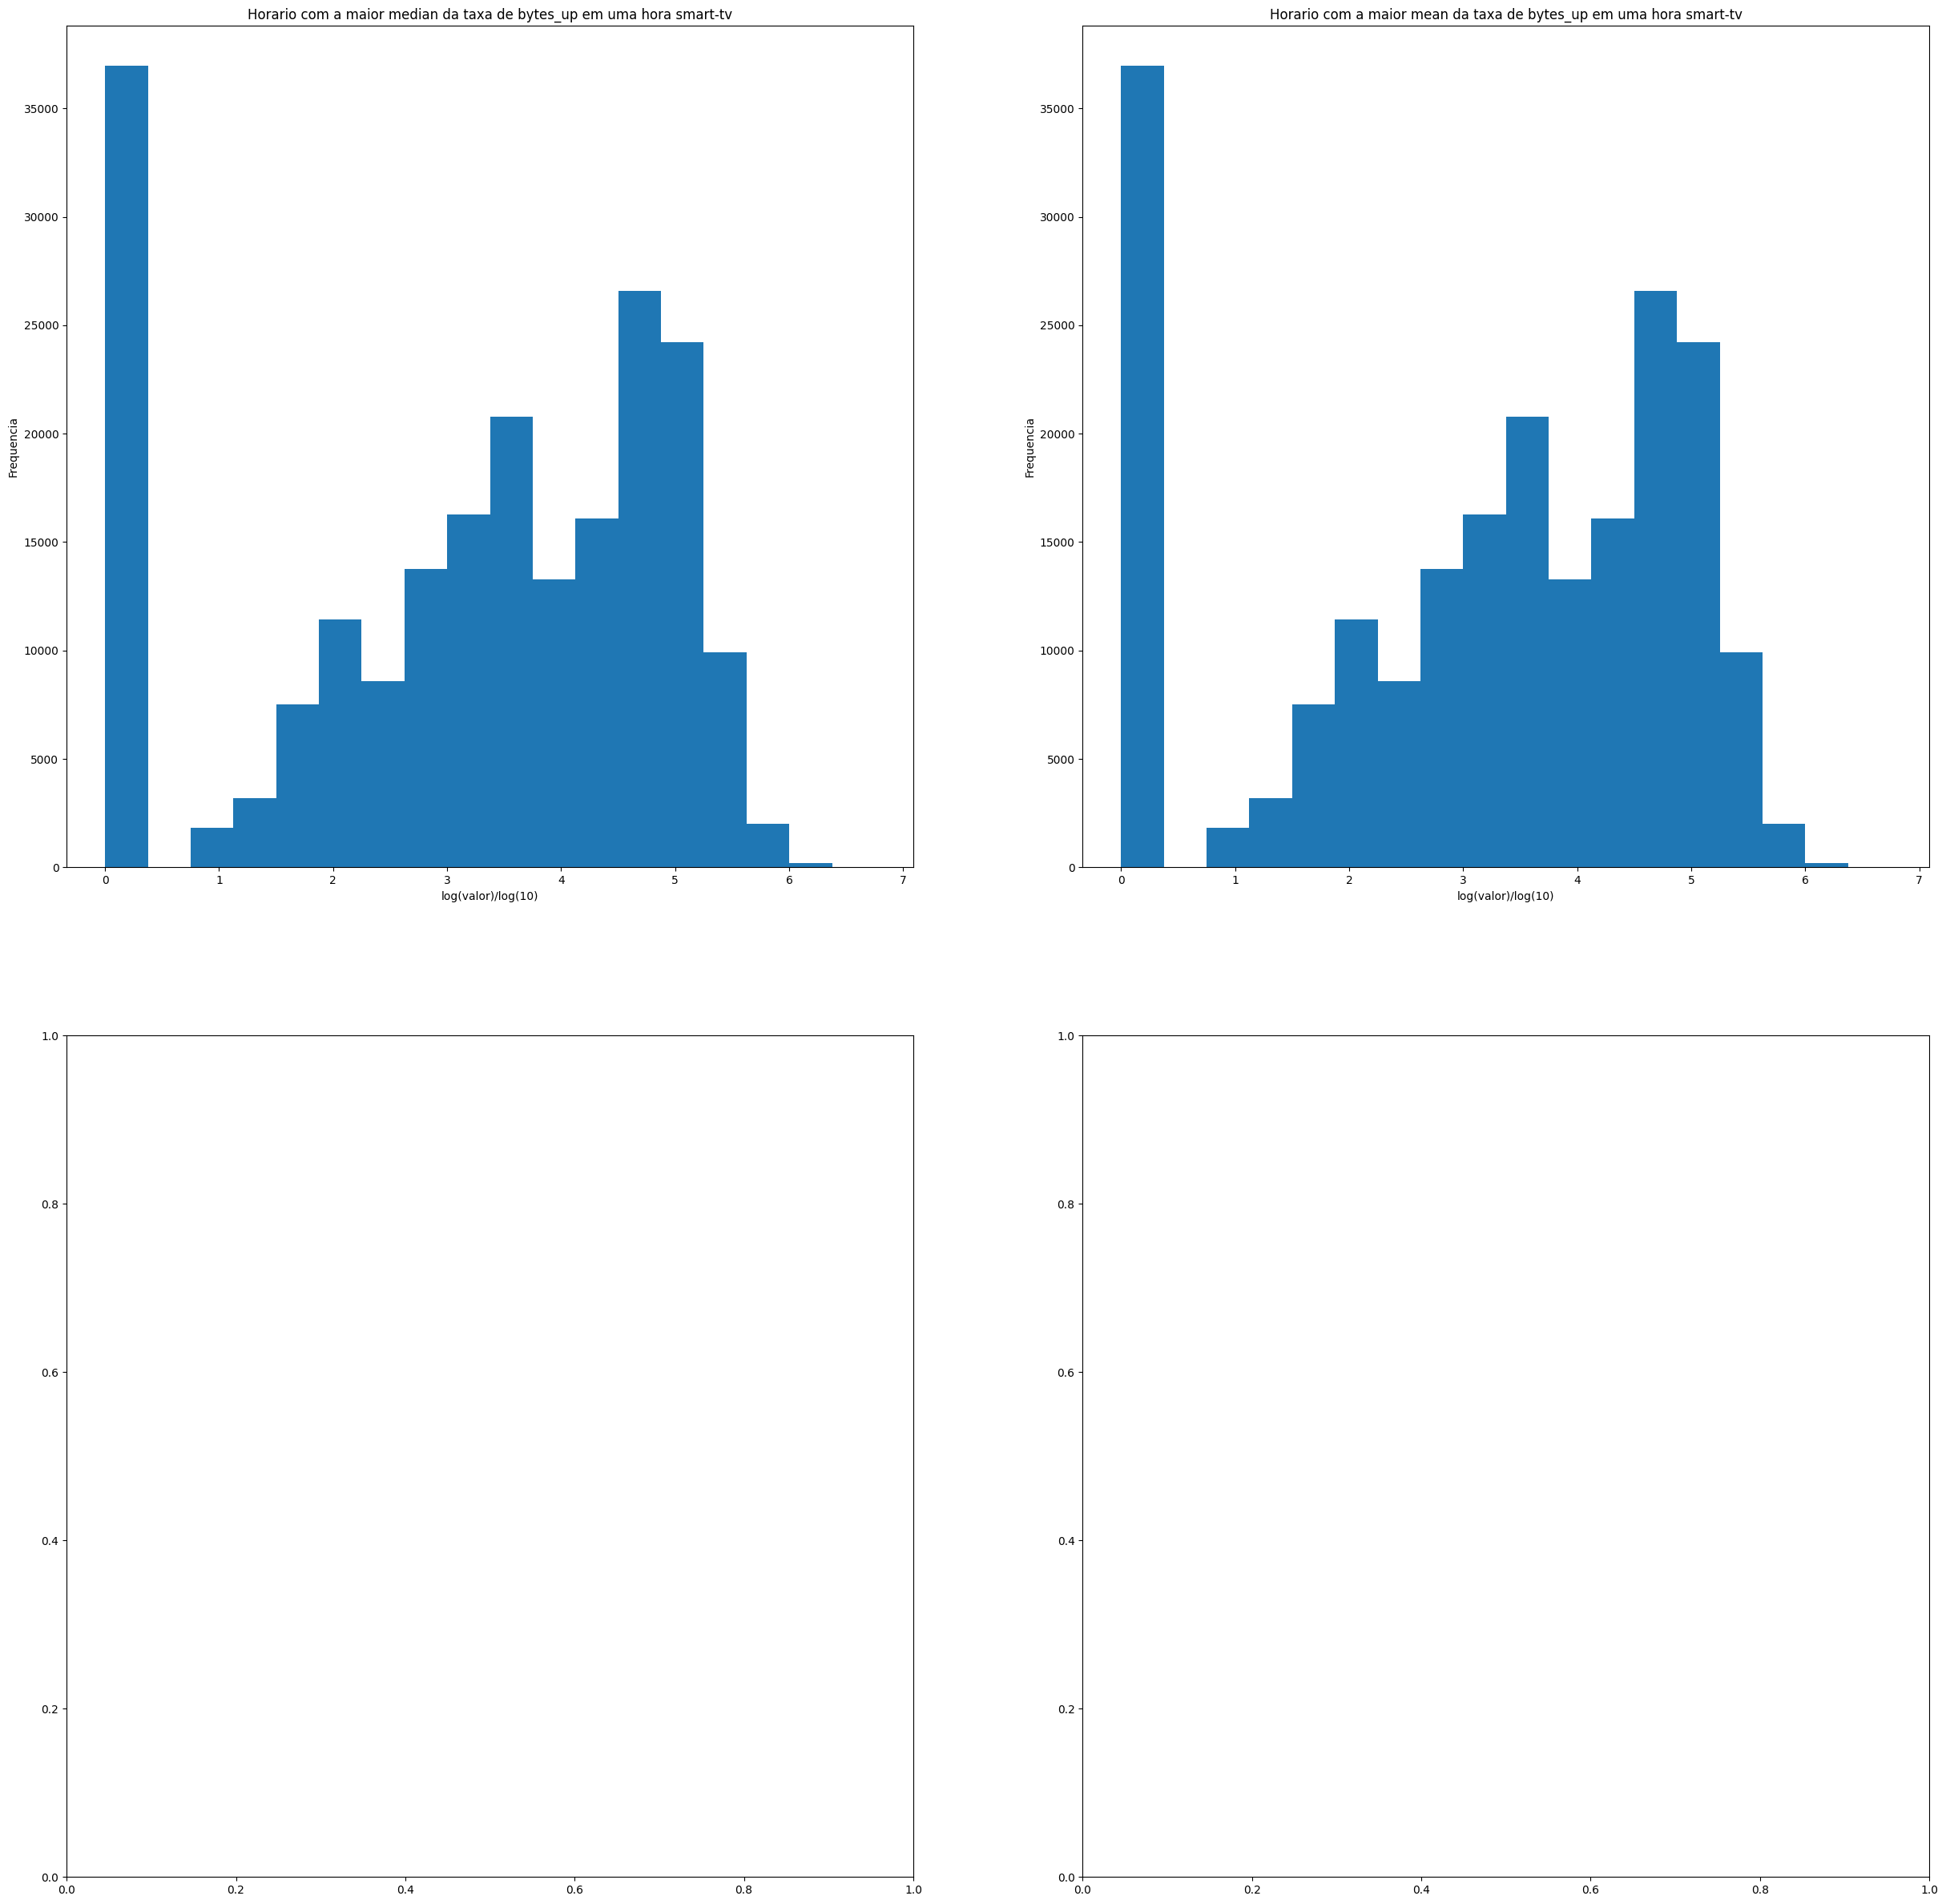

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(30, 30))

data_sets = [(smart_tv_data, 'smart-tv')]
metrics = ['bytes_up', 'bytes_down']
aggregation_funcs = [np.median, np.mean]

for i, (df, device_name) in enumerate(data_sets):
    for j, metric in enumerate(metrics):
        for k, func in enumerate(aggregation_funcs):
            data_set = df.groupby("date_hour")[metric].apply(func).argmax()
            ds = df.query('date_hour == @data_set')[metric]
            ax[i][2*j+k].hist(ds, bins=get_sturges_bins(ds))
            ax[i][2*j+k].set_title(f"Horario com a maior {func.__name__} da taxa de {metric} em uma hora {device_name}")
            ax[i][2*j+k].set_xlabel("log(valor)/log(10)")
            ax[i][2*j+k].set_ylabel("Frequencia")

plt.show()

# Correlation Stats in Hours with More Traffic

# Comparation between Devices

# Conclution